# EE2213 Project: Multi-Class Classification

#### <span style="color:red">No additional library imports are permitted.</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

## PART 0: Data Loading and Preparation

In [2]:
def load_openml_dataset():

    dataset = fetch_openml(name='vehicle', version=1, as_frame=True, parser='auto')
    X = dataset.data.values
    
    target_values = dataset.target.values
    unique_targets = np.unique(target_values)
    
    # Create mapping from string labels to integers
    label_to_int = {label: i for i, label in enumerate(unique_targets)}
    y = np.array([label_to_int[label] for label in target_values])
    
    feature_names = dataset.feature_names
    
    return X, y, feature_names

X, y, feature_names = load_openml_dataset()
print(f"Feature shape: {X.shape}, target output shape:{y.shape}")
print(f"feature names: {feature_names}")


Feature shape: (846, 18), target output shape:(846,)
feature names: ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO']


## PART 1: Dataset Partition and One-hot Encoding

In [3]:
def dataset_partition_encoding(X, y):
    """
    Input type
    :X type: numpy.ndarray of size (number_of_samples, number_of_features)
    :y type: numpy.ndarray of size (number_of_samples,)

    Return type
    :X_train type: numpy.ndarray of size (number_of_training_samples, number_of_features)
    :X_val type: numpy.ndarray of size (number_of_validation_samples, number_of_features)
    :X_test type: numpy.ndarray of size (number_of_test_samples, number_of_features)
    :Ytr_onehot type: numpy.ndarray of size (number_of_training_samples, num_classes)
    :Yval_onehot type: numpy.ndarray of size (number_of_validation_samples, num_classes)
    :Yts_onehot type: numpy.ndarray of size (number_of_test_samples, num_classes)

    """

    # your code goes here
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=665)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=665)
    
    encoder = OneHotEncoder(sparse_output=False)
    Ytr_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
    Yval_onehot = encoder.transform(y_val.reshape(-1, 1))
    Yts_onehot = encoder.transform(y_test.reshape(-1, 1))
    

    # return in this order
    return X_train, X_val, X_test, Ytr_onehot, Yval_onehot, Yts_onehot

X_train, X_val, X_test, Ytr_onehot, Yval_onehot, Yts_onehot = dataset_partition_encoding(X, y)
print(f"Training set shape: {X_train.shape}, {Ytr_onehot.shape}")
print(f"Validation set shape: {X_val.shape}, {Yval_onehot.shape}")
print(f"Test set shape: {X_test.shape}, {Yts_onehot.shape}")

Training set shape: (507, 18), (507, 4)
Validation set shape: (169, 18), (169, 4)
Test set shape: (170, 18), (170, 4)


## PART 2: Feature Selection using Pearson Correlation

In [4]:
def feature_selection(X_train, X_val, X_test, feature_names, threshold=0.8):
    """
    Input type
    :X_train type: numpy.ndarray of size (number_of_training_samples, number_of_features)
    :X_val type: numpy.ndarray of size (number_of_validation_samples, number_of_features)
    :X_test type: numpy.ndarray of size (number_of_test_samples, number_of_features)
    :feature_names type: list of str
    :threshold type: float

    Return type
    :selected_features type: list of str
    :FS_X_train type: numpy.ndarray of size (number_of_training_samples, number_of_selected_features)
    :FS_X_val type: numpy.ndarray of size (number_of_validation_samples, number_of_selected_features)
    :FS_X_test type: numpy.ndarray of size (number_of_test_samples, number_of_selected_features)

    """

    # your code goes here
    corr_matrix = np.corrcoef(X_train, rowvar=False)

    to_keep = [0]

    for i in range(1, X_train.shape[1]):
        is_correlated = False
        for j in to_keep:
            if abs(corr_matrix[i, j]) > threshold:
                is_correlated = True
                break
        if not is_correlated:
            to_keep.append(i)

    selected_features = [feature_names[i] for i in to_keep]
    FS_X_train = X_train[:, to_keep]
    FS_X_val = X_val[:, to_keep]
    FS_X_test = X_test[:, to_keep]

    # return in this order
    return selected_features, FS_X_train, FS_X_val, FS_X_test


selected_features, FS_X_train, FS_X_val, FS_X_test = feature_selection(X_train, X_val, X_test, feature_names)


print(f"{len(selected_features)} Selected Features: {selected_features}")
print(f"Training set shape after feature selection: {FS_X_train.shape}, {Ytr_onehot.shape}")
print(f"Validation set shape after feature selection: {FS_X_val.shape}, {Yval_onehot.shape}")
print(f"Test set shape after feature selection: {FS_X_test.shape}, {Yts_onehot.shape}")


9 Selected Features: ['COMPACTNESS', 'CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR']
Training set shape after feature selection: (507, 9), (507, 4)
Validation set shape after feature selection: (169, 9), (169, 4)
Test set shape after feature selection: (170, 9), (170, 4)


## PART 3: Polynomial Feature Transformation and Classification

In [9]:

def polynomial_for_classification(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot, max_order=3, lamda=0.001):
    """
    Args:
        FS_X_train (np.ndarray): Feature matrix for training.
        FS_X_val (np.ndarray): Feature matrix for validation.
        FS_X_test (np.ndarray): Feature matrix for testing.
        Ytr_onehot (np.ndarray): One-hot encoded labels for training.
        Yval_onehot (np.ndarray): One-hot encoded labels for validation.
        Yts_onehot (np.ndarray): One-hot encoded labels for testing.
        max_order (int): Maximum polynomial order to consider.
        lamda (float): Regularization strength.

    Returns:
        acc_train_list (list): Training accuracies for each polynomial order.
        acc_val_list (list): Validation accuracies for each polynomial order.
        best_order (int): Best polynomial order based on validation accuracy.
        acc_test (float): Test accuracy for the best polynomial order.

    """

    # your code goes here
    acc_train_list = []
    acc_val_list = []
    acc_test = 0.0
    best_order = None
    best_W = None

    for order in range(1, 4):
        features = PolynomialFeatures(degree=order)
        poly_tr = features.fit_transform(FS_X_train)
        poly_val = features.transform(FS_X_val)
        
        r, c = poly_tr.shape

        if r >= c:
            XtX = poly_tr.T @ poly_tr
            try:
                W = np.linalg.inv(XtX) @ poly_tr.T @ Ytr_onehot
            except np.linalg.LinAlgError:
                W = np.linalg.inv(XtX + lamda * np.eye(c)) @ poly_tr.T @ Ytr_onehot

        elif r < c:
            XXt = poly_tr @ poly_tr.T
            try:
                W = poly_tr.T @ np.linalg.inv(XXt) @ Ytr_onehot
            except np.linalg.LinAlgError:
                W = poly_tr.T @ np.linalg.inv(XXt + lamda * np.eye(r)) @ Ytr_onehot

        

        Ytr_pred = np.argmax(poly_tr @ W, axis=1)
        Yval_pred = np.argmax(poly_val @ W, axis=1)

        Ytr_true = np.argmax(Ytr_onehot, axis=1)
        Yval_true = np.argmax(Yval_onehot, axis=1)

        acc_train_list.append(accuracy_score(Ytr_true, Ytr_pred))
        acc_val_list.append(accuracy_score(Yval_true, Yval_pred))

        if best_order is None or acc_val_list[-1] == np.max(acc_val_list):
            best_order = order
            best_W = W

    best = PolynomialFeatures(degree=best_order)
    poly_test = best.fit_transform(FS_X_test)
    Yts_pred = np.argmax(poly_test @ best_W, axis=1)
    Yts_true = np.argmax(Yts_onehot, axis=1)

    acc_test = accuracy_score(Yts_true, Yts_pred)

    # return in this order              
    return acc_train_list, acc_val_list, best_order, acc_test

acc_train_list, acc_val_list, best_order, acc_test = polynomial_for_classification(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot)

print(f"Training accuracies: {np.round(acc_train_list,2)}")
print(f"Validation accuracies: {np.round(acc_val_list,2)}")
print(f"Best polynomial order: {best_order}")
print(f"Test accuracy for best order {best_order}: {np.round(acc_test,2)}")

Training accuracies: [0.71 0.82 0.92]
Validation accuracies: [0.71 0.73 0.7 ]
Best polynomial order: 2
Test accuracy for best order 2: 0.81


## PART 4: Multinomial Logistic Regression

Without Normalization
Training accuracies for different learning rates: [0.65 0.64 0.54 0.59]
Validation accuracies for different learning rates: [0.59 0.6  0.49 0.53]
Best learning rate: 0.001
Test accuracy for best learning rate 0.001: 0.63
With Z-score Standardization
Training accuracies for different learning rates: [0.49 0.67 0.73 0.73]
Validation accuracies for different learning rates: [0.41 0.66 0.72 0.69]
Best learning rate: 0.01
Test accuracy for best learning rate 0.01: 0.74


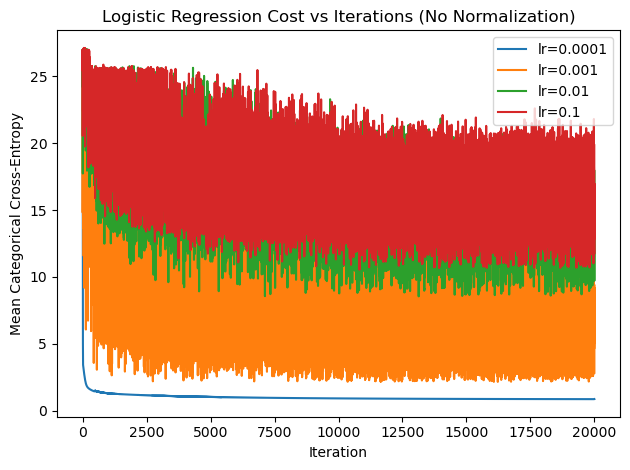

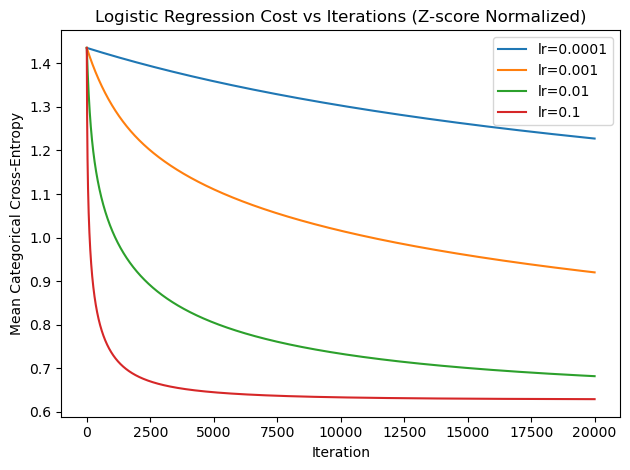

In [6]:
def MLR_select_lr(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot, lr_list=[0.0001, 0.001, 0.01, 0.1], num_iters=20000):


    # --------- helpers ----------
    def add_bias(X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def softmax_stable(Z):
        # Z: (N,C)
        Zs = Z - np.max(Z, axis=1, keepdims=True)
        P = np.exp(Zs)
        P /= np.sum(P, axis=1, keepdims=True)
        # clip to avoid log(0)
        eps = 1e-15
        return np.clip(P, eps, 1 - eps)

    def cross_entropy_mean(P, Y_onehot):
        # P, Y_onehot: (N,C)
        return -np.mean(np.sum(Y_onehot * np.log(P), axis=1))

    def accuracy(P, Y_onehot):
        return float(np.mean(np.argmax(P, axis=1) == np.argmax(Y_onehot, axis=1)))

    def train_one_setting(Xtr_b, Xval_b, Xts_b, Ytr, Yval, Yts, lr, num_iters, seed):

        N, Dp1 = Xtr_b.shape       # Dp1 = d+1 (with bias)
        C = Ytr.shape[1]

        np.random.seed(seed)
        W = np.random.normal(0.0, 0.1, size=(Dp1, C))


        costs = np.empty(num_iters + 1, dtype=float)

        # initial cost
        P_tr = softmax_stable(Xtr_b @ W)
        costs[0] = cross_entropy_mean(P_tr, Ytr)

        for t in range(1, num_iters + 1):
            # forward
            P_tr = softmax_stable(Xtr_b @ W)
            # gradient: (d+1, C)
            G = (Xtr_b.T @ (P_tr - Ytr)) / N
            # GD update
            W -= lr * G
            # record cost
            P_tr = softmax_stable(Xtr_b @ W)
            costs[t] = cross_entropy_mean(P_tr, Ytr)

        # final accuracies
        train_acc = accuracy(softmax_stable(Xtr_b @ W), Ytr)
        val_acc   = accuracy(softmax_stable(Xval_b @ W), Yval)
        test_acc  = accuracy(softmax_stable(Xts_b  @ W), Yts)

        return costs, train_acc, val_acc, test_acc

    # --------- (1) WITHOUT normalization ----------
    # add bias
    Xtr_b  = add_bias(FS_X_train)
    Xval_b = add_bias(FS_X_val)
    Xts_b  = add_bias(FS_X_test)

    cost_dict = {}
    acc_train_list_Log = []
    acc_val_list_Log   = []

    seed = 665

    best_lr = None
    best_val_acc = -np.inf
    best_test_acc = 0.0

    for lr in lr_list:
        costs, tr_acc, val_acc, ts_acc = train_one_setting(
            Xtr_b, Xval_b, Xts_b, Ytr_onehot, Yval_onehot, Yts_onehot,
            lr=lr, num_iters=num_iters, seed=seed
        )
        cost_dict[lr] = costs
        acc_train_list_Log.append(tr_acc)
        acc_val_list_Log.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_lr = lr
            best_test_acc = ts_acc

    acc_test = best_test_acc

    # --------- (2) WITH z-score normalization ----------
    scaler = StandardScaler().fit(FS_X_train)           
    Xtr_n  = scaler.transform(FS_X_train)
    Xval_n = scaler.transform(FS_X_val)
    Xts_n  = scaler.transform(FS_X_test)

    Xtrn_b  = add_bias(Xtr_n)
    Xvaln_b = add_bias(Xval_n)
    Xtsn_b  = add_bias(Xts_n)

    cost_dict_norm = {}
    acc_train_list_Log_norm = []
    acc_val_list_Log_norm   = []

    best_lr_norm = None
    best_val_acc_norm = -np.inf
    best_test_acc_norm = 0.0

    for lr in lr_list:
        costs, tr_acc, val_acc, ts_acc = train_one_setting(
            Xtrn_b, Xvaln_b, Xtsn_b, Ytr_onehot, Yval_onehot, Yts_onehot,
            lr=lr, num_iters=num_iters, seed=seed
        )
        cost_dict_norm[lr] = costs
        acc_train_list_Log_norm.append(tr_acc)
        acc_val_list_Log_norm.append(val_acc)

        if val_acc > best_val_acc_norm:
            best_val_acc_norm = val_acc
            best_lr_norm = lr
            best_test_acc_norm = ts_acc

    acc_test_norm = best_test_acc_norm

    
    return (cost_dict, acc_train_list_Log, acc_val_list_Log, best_lr, acc_test, cost_dict_norm, acc_train_list_Log_norm, acc_val_list_Log_norm, best_lr_norm, acc_test_norm)


def cost_vs_iter_curve(cost_dict, cost_dict_norm):
    """Plot 2 figures: one for raw features, one for z-score features (same axes style)."""
    # figure 1: without normalization
    plt.figure()
    for lr, costs in cost_dict.items():
        plt.plot(range(len(costs)), costs, label=f"lr={lr}")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Categorical Cross-Entropy")
    plt.title("Logistic Regression Cost vs Iterations (No Normalization)")
    plt.legend()
    plt.tight_layout()

    # figure 2: with normalization
    plt.figure()
    for lr, costs in cost_dict_norm.items():
        plt.plot(range(len(costs)), costs, label=f"lr={lr}")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Categorical Cross-Entropy")
    plt.title("Logistic Regression Cost vs Iterations (Z-score Normalized)")
    plt.legend()
    plt.tight_layout()
    plt.show()




cost_dict,acc_train_list_Log, acc_val_list_Log, best_lr,test_acc_Log, cost_dict_norm, acc_train_list_Log_norm, acc_val_list_Log_norm, best_lr_norm, test_acc_Log_norm = MLR_select_lr(FS_X_train, FS_X_val, FS_X_test, Ytr_onehot, Yval_onehot, Yts_onehot)

print(f"Without Normalization")
print(f"Training accuracies for different learning rates: {np.round(acc_train_list_Log,2)}")
print(f"Validation accuracies for different learning rates: {np.round(acc_val_list_Log,2)}")
print(f"Best learning rate: {best_lr}")
print(f"Test accuracy for best learning rate {best_lr}: {np.round(test_acc_Log,2)}")


print(f"With Z-score Standardization")
print(f"Training accuracies for different learning rates: {np.round(acc_train_list_Log_norm,2)}")
print(f"Validation accuracies for different learning rates: {np.round(acc_val_list_Log_norm,2)}")
print(f"Best learning rate: {best_lr_norm}")
print(f"Test accuracy for best learning rate {best_lr_norm}: {np.round(test_acc_Log_norm,2)}")

cost_vs_iter_curve (cost_dict, cost_dict_norm)

### Analysis of Effect of Normalization Based on Your Results

Normalization rescales features so that each has mean = 0 and standard deviation = 1.
This ensures that all features contribute equally to gradient updates, preventing large-scale features from dominating.
Hence, gradient descent converges faster and with more stability, since weight updates occur along balanced directions.
Without normalization, features with larger magnitudes produce large gradients, leading to unstable and inefficient updates.
For practical uses, normalization improves the training stability, convergence speed, and overall accuracy of multinomial logistic regression.
It allows higher learning rates to be used effectively and leads to lower loss and higher accuracy on both training and validation sets.
